# Exploring an eCommerce Clothing Dataset

## Table of Contents:
* [About the Dataset](#introduction)
* [Data Overview](#overview)
    - [General Product and Category Breakdown](#gen)
    - [Pricing Explorations](#price)
* [Question 1: Shoud a buyer focus more on men's or women's fashion to maximize sales price?](#q1)
* [Question 2. Are discounts on products affected by season?](#q2)
* [Question 3. How has the price of apparel items carried the company changed over time? Have particular styles changed more than others?](#q3)
* [Dataset Challenges and Future Work](#dc)

## About the Dataset  <a name="introduction"></a>
<br>

Myntra is an ecommerce company founded in Bengaluru, India in 2007. It originally specialized in personolized gift items, but has expanded to hundreds of thousands of products from over 1,000 brands. The company's primary focus is fashion, and the dataset being explored contains more than 41,000 unique products including clothing and accessories for men and women.

This dataset provides a rich framework of pricing, images, and product attributes for exploration. Items are grouped by gender and by seasonality, and the dataset spans eight years so we can look at patterns over time. A dataset like this could be invaluable to company business analysts and purchasers to look at their company's focus over time by examining when items were added and dropped from the collection, what items were always sold at full price and which were discounted, and other inventory related questions.

With this sample data, we can look at pricing trends over time and how gender and seasonal categorizations may affect price. I've tried to structure my questions to explore each of these facets. The data represents a sample of SKUs added to the website (https://www.myntra.com/) between 2010 and 2018. 

Some obvious questions can be answered with this data by simple grouping, including looking at product variety, such as the number of item types classified by each season or price range. I have done some of this as a first pass at exploration, then I tried to ask more insightful questions to tease out deeper patterns in the data.

<b>Question 1: Shoud a buyer focus more on men's or women's fashion to maximize sales price?</b>

Preliminary analysis of the dataset shows that men's items were more prevalent then women's, and more expensive on average. This seemed unusual for a general fashion website selling hundreds of thousands of items, so I wanted to eplore whether there is a signifigant difference in gender in pricing within this sample dataset. I chose to look at tops by season for this analysis because they are nearly 30 percent of the overall sample.

<b>Question 2. Are discounts on products affected by season?</b>

On average, Footwear prices are higher than the averages for the other two categories, but they are also discounted at nearly double the rate. I wanted to explore whether any correlation exists between the types and seasonality of items in the Footwear category and how likely they are to be discounted. For this I looked at regular and discount prices, broken out by gender categories, across all seasons.

<b>Question 3. How has the price of apparel items carried the company changed over time? Have particular styles changed more than others?</b>

Predicting demend is a big part of retail profitability, so understanding sales across time is very important. Since we do not have sales figures in the dataset, we can look at how prices and discount rates have changed through time to get a feel for changing customer preferences/market influences.

## Data Overview <a name="overview"></a>
<br>

<h3>General Product and Category Breakdown</h3> <a name="gen"></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
from scipy import stats
from scipy.stats import ttest_ind # , ttest_ind_from_stats
%matplotlib inline

df = pd.read_csv('C:/Users/xcxg109/Downloads/styles5.csv')
df['reduction'] = np.where(df['price_disc'] < df['price_us'], df['price_us']-df['price_disc'], np.nan)
pd.options.mode.chained_assignment = None

In [16]:
def cat_filter(df, category, cat_filter):
    cat_filter = df.loc[df[category]== cat_filter]
    return cat_filter

def bar_graph (size, data1, data2, title):
   # data2 = data2.sort_values(ascending=False)
    plt.figure(figsize=size)
    plt.bar(data1,data2)
    plt.title(title, fontsize=16)
    plt.show

In [17]:
#get counts for all items in the collection and count breakdowns by masterCategory
total_items = df['id'].count()
counts = df.groupby(['masterCategory']).count()
counts_index = df.groupby(['masterCategory']).count().reset_index()
counts['percent'] = counts['id'].apply(lambda x: x/total_items*100)  #create new column of percents for each category

items_acc = cat_filter(counts_index,'masterCategory','Accessories')
items_apparel = cat_filter(counts_index,'masterCategory','Apparel')
items_footwear = cat_filter(counts_index,'masterCategory','Footwear')

#break df down further to each subCategory, with counts and percentages
subcats = df.groupby(['masterCategory', 'subCategory']).count().reset_index()
acc_subcats = cat_filter(subcats, 'masterCategory', 'Accessories')
total_acc = items_acc['id']
acc_subcats['percent'] = acc_subcats['id'].apply(lambda x: x/total_acc*100)

apparel_subcats = cat_filter(subcats, 'masterCategory', 'Apparel')
total_apparel = items_apparel['id']
apparel_subcats['percent'] = apparel_subcats['id'].apply(lambda x: x/total_apparel*100) 

footwear_subcats = cat_filter(subcats, 'masterCategory', 'Footwear')
total_footwear = items_footwear['id']
footwear_subcats['percent'] = footwear_subcats['id'].apply(lambda x: x/total_footwear*100)

There are 41770 items in the collection. The number of products broken down by category is:

masterCategory
Accessories    11213
Apparel        21374
Footwear        9183
Name: id, dtype: int64

Dividing the data further into subcategories shows a variety of accessories (n=14), with a smaller
number of apparel items (n=7) and only 3 footwear subcategories.


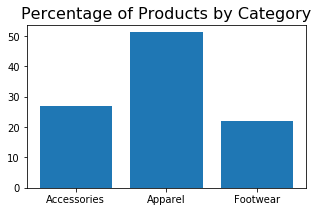

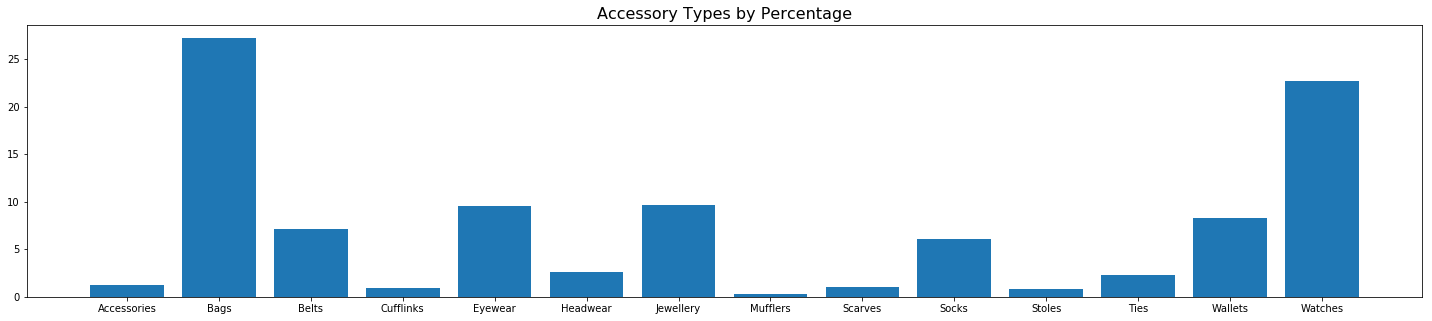

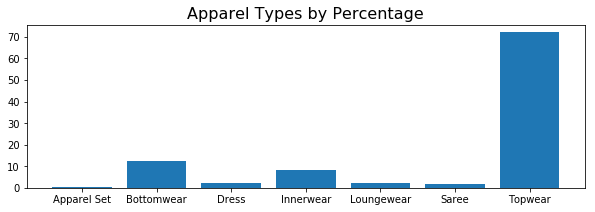

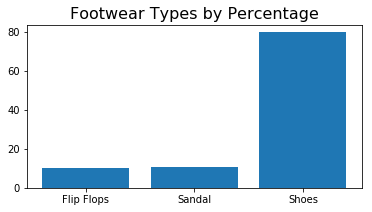

In [18]:
print('There are {} items in the collection. The number of products broken down by category is:\n\n{}'
      .format(total_items, counts['id']))

bar_graph((5,3),counts_index['masterCategory'],counts['percent'], 'Percentage of Products by Category')

print('\nDividing the data further into subcategories shows a variety of accessories (n=14), with a smaller')
print('number of apparel items (n=7) and only 3 footwear subcategories.')

bar_graph((25,5),acc_subcats['subCategory'],acc_subcats['percent'],'Accessory Types by Percentage')
bar_graph((10,3),apparel_subcats['subCategory'],apparel_subcats['percent'],'Apparel Types by Percentage')
bar_graph((6,3),footwear_subcats['subCategory'],footwear_subcats['percent'],'Footwear Types by Percentage')

Finally, this is a straight count of every type of product in the collection.



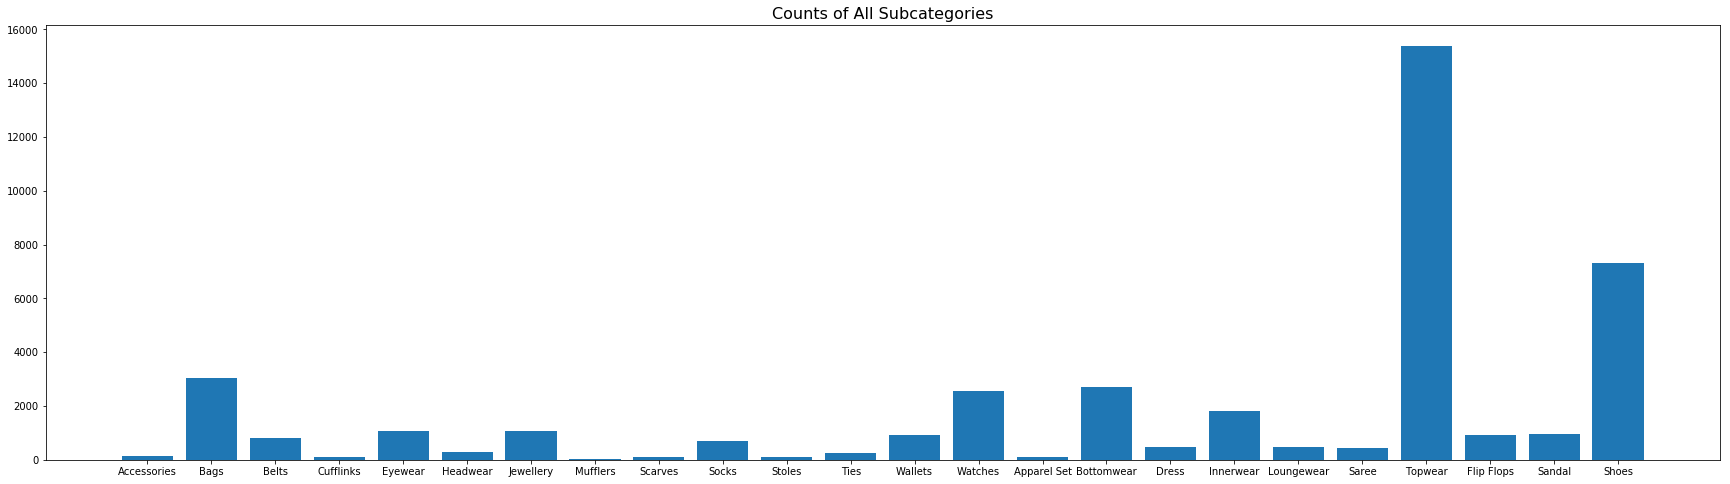

In [5]:
print('Finally, this is a straight count of every type of product in the collection.\n')

bar_graph((30,8),subcats['subCategory'],subcats['id'],'Counts of All Subcategories')

Items can also be broken down by gender categories: Girls, Boys, Women, Men, and Unisex
The breakdown of items in the collection along these lines is:

gender
Boys        817
Girls       642
Men       21486
Unisex     2075
Women     16750
Name: id, dtype: int64


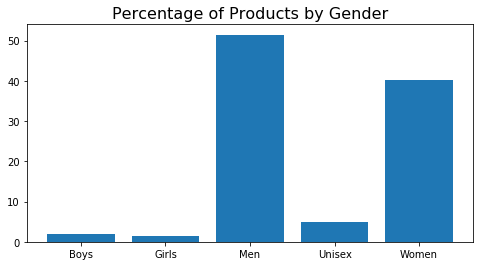

In [6]:
counts_gender = df.groupby(['gender']).count()
counts_gender_index = df.groupby(['gender']).count().reset_index()
counts_gender['percent'] = counts_gender['id'].apply(lambda x: x/total_items*100)

print('Items can also be broken down by gender categories: Girls, Boys, Women, Men, and Unisex')
print('The breakdown of items in the collection along these lines is:\n\n{}'.format(counts_gender['id']))

bar_graph((8,4),counts_gender_index['gender'],counts_gender['percent'],'Percentage of Products by Gender')

Finally, items in the collection are classified by season. The number of products by season looks like:

season
Fall      11385
Spring      607
Summer    21330
Winter     8448
Name: id, dtype: int64


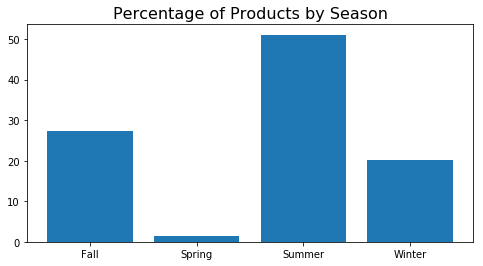

In [7]:
counts_season = df.groupby(['season']).count()
counts_season_index = df.groupby(['season']).count().reset_index()
counts_season['percent'] = counts_season['id'].apply(lambda x: x/total_items*100)

print('Finally, items in the collection are classified by season. The number of products by season looks like:\n\n{}'.format(counts_season['id']))

bar_graph((8,4),counts_season_index['season'],counts_season['percent'],'Percentage of Products by Season')

<h3>Pricing Explorations</h3> <a name ="price"></a>

In [8]:
ave_price = df.groupby(['masterCategory']).mean().round(2)
price_min = df.groupby(['masterCategory']).min().reset_index()
price_max = df.groupby(['masterCategory']).max().reset_index()
std_price = df.groupby('masterCategory').std().round(2)
pop_std_price = np.std(df['price_us'])
#se = stats.sem(df['price_us'])

def price_function(df1, df2, category, cat_filter, price):
    minimum = df.loc[df[category] == cat_filter][price].min()
    maximum = df.loc[df[category] == cat_filter][price].max()
    return minimum, maximum

accessory_min, accessory_max = price_function(price_min, price_max, 'masterCategory', 'Accessories', 'price_us')
apparel_min, apparel_max = price_function(price_min, price_max, 'masterCategory', 'Apparel', 'price_us')
footwear_min, footwear_max = price_function(price_min, price_max, 'masterCategory', 'Footwear', 'price_us')


print('The least expensive item in the collection is ${}, while the most expensive is ${}. The average item price is'
      .format(df['price_us'].min(), df['price_us'].max()))
print('${}, while the price median is ${}.'.format(round(df['price_us'].mean(), 2), df['price_us'].median()))
print('\nThe mean price breakdown per category is:\n\n {}'.format(ave_price['price_us']))

print('\nFrom this information, we can suppose that Apparel contains many more low priced items than either Accessories or')
print('Footwear, because the mean Apparel price is approximately 50% lower than the other two categories, but we know that')
print('about half of the products in the dataset are located in Apparel.')

print('\nIt can also be useful to look at the variation of prices within each group to undesrta. For')
print('accessories, the price ranges from ${} to ${}, while for apparel, the range is smaller (${} to ${}).'
      .format(accessory_min, accessory_max, apparel_min, apparel_max))
print('Footware prices vary from from ${} to a maximum of ${}.'.format(footwear_min, footwear_max))
    
print('\nThe standard deviation for the entire population price is {}. Standard price deviation per category is:\n\n{}'
      .format(round(pop_std_price,2), std_price['price_us']))

print('\nThis tells us that there is less price variation within Apparel and considerably more variation within Accessories.')
print('\nWe can tell from these calculations that price is not normally distributed within this dataset. The population')
print('price skews to the right, because the mean price is greater than the median price.')

print('\nSome visualizations will provide more data about price ranges.')


The least expensive item in the collection is $1.33, while the most expensive is $405.3. The average item price is
$24.34, while the price median is $17.5.

The mean price breakdown per category is:

 masterCategory
Accessories    31.38
Apparel        16.05
Footwear       35.01
Name: price_us, dtype: float64

From this information, we can suppose that Apparel contains many more low priced items than either Accessories or
Footwear, because the mean Apparel price is approximately 50% lower than the other two categories, but we know that
about half of the products in the dataset are located in Apparel.

It can also be useful to look at the variation of prices within each group to get a feel for the range. For
accessories, the price ranges from $1.33 to $405.3, while for apparel, the range is smaller ($1.39 to $245.0).
Footware prices vary from from $2.23 to a maximum of $181.93.

The standard deviation for the entire population price is 24.2. Standard price deviation per category is:

mas

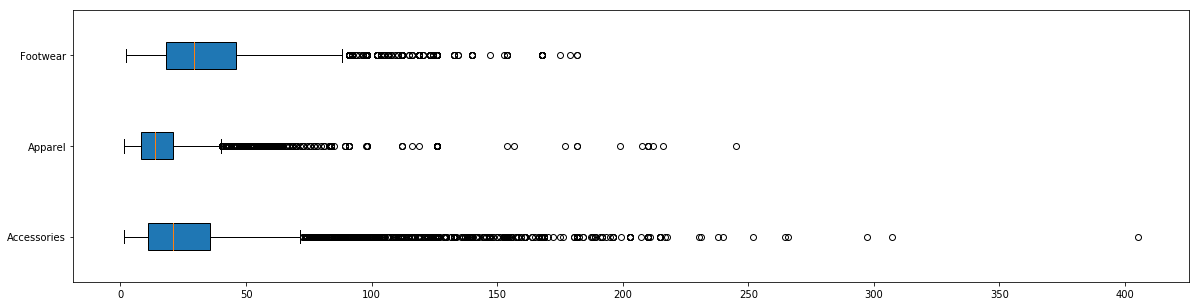

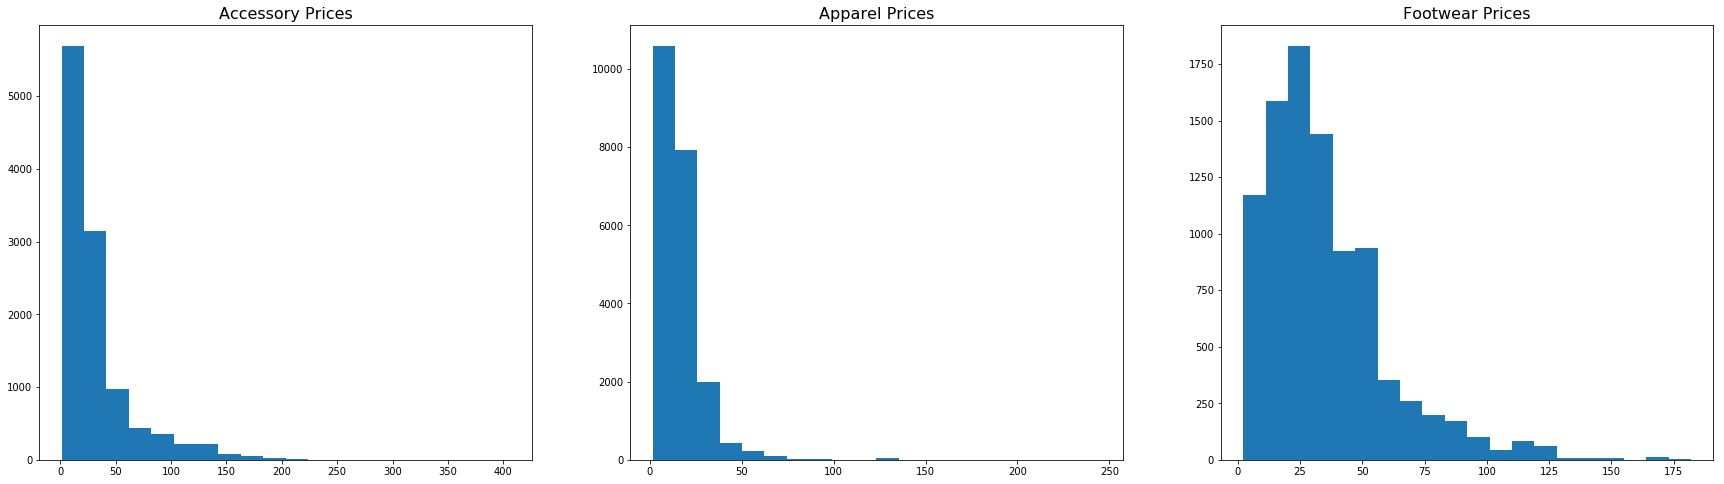

In [19]:
def price_filter(df, category, cat_filter, price):
    price_filter = df.loc[df[category]== cat_filter][price]
    return price_filter

x = price_filter(df,'masterCategory','Accessories','price_us')
y = price_filter(df,'masterCategory','Apparel','price_us')
z = price_filter(df,'masterCategory','Footwear','price_us')


plt.figure(figsize=(20,5))
box_plot_data = [x,y,z]
plt.boxplot(box_plot_data, patch_artist=True, vert=False, labels=['Accessories', 'Apparel', 'Footwear'])

n_bins = 20
fig, axs = plt.subplots(1,3, figsize=(30,8))
axs[0].hist(x, bins=n_bins)
axs[0].set_title('Accessory Prices', fontsize=16)
axs[1].hist(y, bins=n_bins)
axs[1].set_title('Apparel Prices', fontsize=16)
axs[2].hist(z, bins=n_bins)
axs[2].set_title('Footwear Prices', fontsize=16)
plt.show()

Items are sometimes discounted to increase sales. Over the eight years covered in the sample, 6611 items, or 0.16 percent
of the sample inventory, were discounted at some point. The average discount amount within each category (for items
that were discounted) is:

masterCategory
Accessories     6.10
Apparel         6.76
Footwear       11.88
Name: reduction, dtype: float64

It is interesting that the average footwear discount is nearly double the discount rates of the other categories.
We will explore that further in the Questions section.


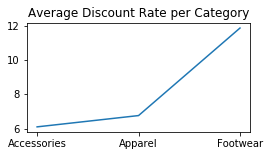

In [10]:
ave_price = df.groupby(['masterCategory']).mean().round(2)
ave_price_index = df.groupby(['masterCategory']).mean().round(2).reset_index()

disc_items = df['reduction'].count()/total_items
disc_items = disc_items.round(2)


print('Items are sometimes discounted to increase sales. Over the eight years covered in the sample, {} items, or {} percent'
     .format(df['reduction'].count(), disc_items))
print('of the sample inventory, were discounted at some point. The average discount amount within each category (for items')
print('that were discounted) is:\n\n{}'.format(ave_price['reduction']))

print('\nIt is interesting that the average footwear discount is nearly double the discount rates of the other categories.')
print('We will explore that further in the Questions section.')

plt.figure(figsize=(4,2))
plt.plot(ave_price['reduction'])
plt.title('Average Discount Rate per Category')
plt.show()

<h2>Question 1: Shoud a buyer focus more on men's or women's fashion to maximize sales price?</h2> <a name="q1"></a>

<h3>Introduction:</h3><br>
This data set is for an Indian company and prices were orginally in Rupees, so I wanted explore potential cultural differences between item pricing and gender classification. For a comparable U.S store selling a large selection of fashion items, it would be logical to assume that prices for women's clothing would be the highest, followed by men's and then by children's clothing, with gir's clothing being more expensive than boy's clothing.

But the data here shows a different story. I chose Tops as the group to explore because every gender category is represented and there are 12,324 data points, which is 29.4 percent of the entire dataset.

The first step in the analysis is to look at the number of products by gender category to make sure we have enough
volume for good data. These counts include four subgroupings of tops: Tshirts, Tops, Shirts, and Sweatshirts.

Item count by gender is:

  gender    id
6   Boys   611
7  Girls   336
8    Men  8305
9  Women  3000

These graphs show the breakdown of the dataset by types of tops and by gender category. Unisex items (72 tops) were
eliminated from these pricing explorations, because we are concerced only with gender classified items here.


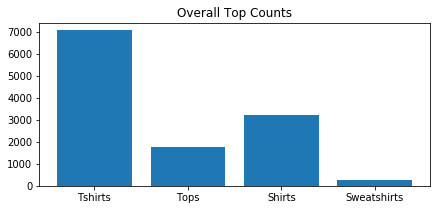

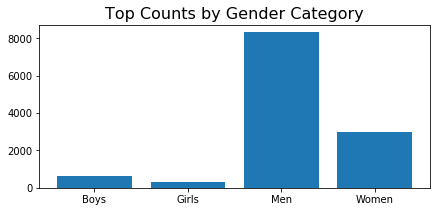

In [11]:
all_shirts = df.groupby(['subcat_2','gender']).count().reset_index()
all_shirts = cat_filter(all_shirts, 'subcat_2', 'shirt')
gen_counts = all_shirts[['gender','id']]
shirts = ['Tshirts', 'Tops', 'Shirts', 'Sweatshirts']
shirt_count = dict()


def article_counts(df, category, cat_filter):
    item_count = df[df[category] == cat_filter]['id'].count()
    return item_count

print('The first step in the analysis is to look at the number of products by gender category to make sure we have enough')
print('volume for good data. These counts include four subgroupings of tops: Tshirts, Tops, Shirts, and Sweatshirts.')
print('\nItem count by gender is:\n\n{}'.format(gen_counts))

print('\nThese graphs show the breakdown of the dataset by types of tops and by gender category. Unisex items (72 tops) were')
print('eliminated from these pricing explorations, because we are concerced only with gender classified items here.')

for shirt in shirts:
    shirt_count[shirt] = article_counts(df, 'articleType', shirt)

plt.figure(figsize=(7,3))
plt.bar(range(len(shirt_count)), list(shirt_count.values()), align='center')
plt.xticks(range(len(shirt_count)), list(shirt_count.keys()))
plt.title('Overall Top Counts')
plt.show()

gen_counts = df.groupby(['gender', 'subcat_2']).count().reset_index()
gen_counts = cat_filter(gen_counts, 'subcat_2', 'shirt')

bar_graph((7,3), gen_counts['gender'], gen_counts['id'], 'Top Counts by Gender Category')

The average price for each gender category is:

gender
Boys      7.01
Girls     5.88
Men      16.18
Women    14.59
Name: price_us, dtype: float64

Average standard deviation among the prices by gender is:

gender
Boys     3.77
Girls    2.02
Men      8.90
Women    7.70
Name: price_us, dtype: float64

We know that men's shirts in the dataset outnumber women's by nearly two to one, so there is a greater quantity of
data in the men's category. Looking at the boxplots, we see that although the men's average price is nearly the same
as that for women, there is more variability among higher priced men's shirts, and men's high prices have a few more
ouliers than women's tops.

Boy's items also outnumber girl's items two to one. In children's clothing there is a larger price difference
between boys and girls, with multiple boy's outlier prices being nearly quadruple the average price of girl's
tops. It is interesting to note, however, the the pricing for girl's tops has the widest distribution 

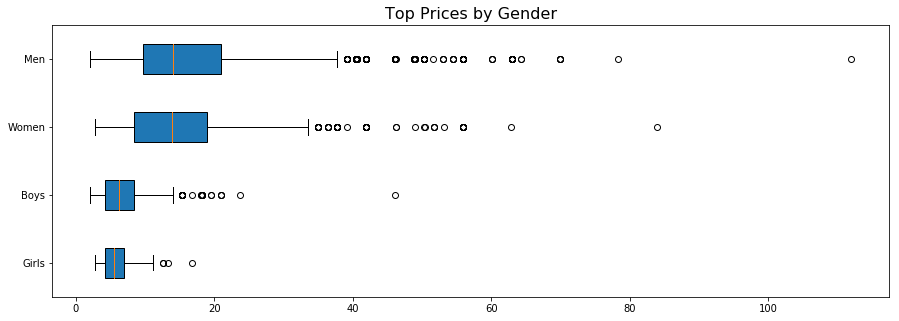

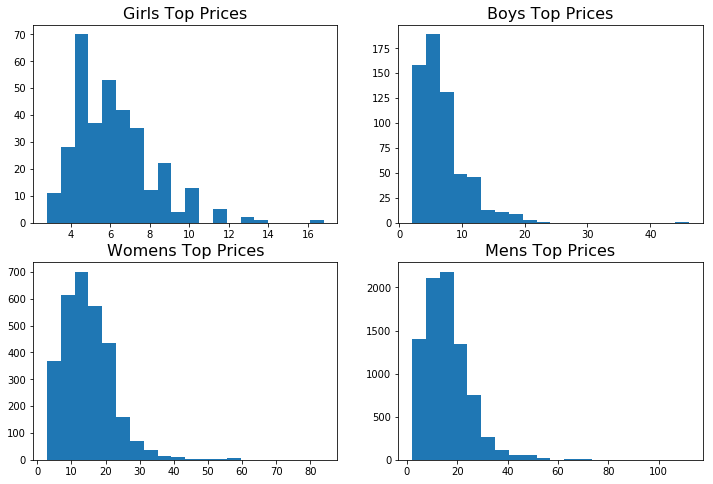

In [12]:
top_mean = df.groupby(['subcat_2', 'gender']).mean().round(2).reset_index()
top_mean = cat_filter(top_mean, 'subcat_2', 'shirt')
top_mean = top_mean.set_index('gender')

top_std = df.groupby(['subcat_2', 'gender']).std().round(2).reset_index()
top_std = cat_filter(top_std, 'subcat_2', 'shirt')
top_std = top_std.set_index('gender')

gender_price = df[df['subcat_2']=='shirt']

girls = price_filter(gender_price,'gender','Girls','price_us')
boys = price_filter(gender_price,'gender','Boys','price_us')
women = price_filter(gender_price,'gender','Women','price_us')
men = price_filter(gender_price,'gender','Men','price_us')

print('The average price for each gender category is:\n\n{}'.format(top_mean['price_us']))
print('\nAverage standard deviation among the prices by gender is:\n\n{}'.format(top_std['price_us']))
print('\nWe know that men\'s shirts in the dataset outnumber women\'s by nearly two to one, so there is a greater quantity of')
print('data in the men\'s category. Looking at the boxplots, we see that although the men\'s average price is nearly the same')
print('as that for women, there is more variability among higher priced men\'s shirts, and men\'s high prices have a few more')
print('ouliers than women\'s tops.')

print('\nBoy\'s items also outnumber girl\'s items two to one. In children\'s clothing there is a larger price difference')
print('between boys and girls, with multiple boy\'s outlier prices being nearly quadruple the average price of girl\'s')
print('tops. It is interesting to note, however, the the pricing for girl\'s tops has the widest distribution of all of the')
print('gender categories.')

print('\nThe historgrams show the same right-skewed distribution that we saw for the dataset as a whole. And again the means are')
print('higher than the median. Men\'s median price is $13.99, while the mean is $16.18. For women, we have $13.93 as the median')
print('and $14.59 as the mean.')

plt.figure(figsize=(15,5))
box_plot_data = [girls,boys,women,men]
plt.boxplot(box_plot_data, patch_artist=True, vert=False, labels=['Girls', 'Boys', 'Women', 'Men'])
plt.title('Top Prices by Gender', fontsize=16)
plt.show()

n_bins = 20
fig, axs = plt.subplots(2,2, figsize=(12,8))
axs[0,0].hist(girls, bins=n_bins)
axs[0,0].set_title('Girls Top Prices', fontsize=16)
axs[0,1].hist(boys, bins=n_bins)
axs[0,1].set_title('Boys Top Prices', fontsize=16)
axs[1,0].hist(women, bins=n_bins)
axs[1,0].set_title('Womens Top Prices', fontsize=16)
axs[1,1].hist(men, bins=n_bins)
axs[1,1].set_title('Mens Top Prices', fontsize=16)

plt.show()

Calculting the p-value:

Null hypothesis: There is not a significant relation between gender classification and price for items in the dataset.

Alternate hypothesis: Price is correlated to gender classification.

In [13]:
women_price = gender_price[gender_price['gender']=='Women']
men_price = gender_price[gender_price['gender']=='Men']

N=3000
s1 = women_price['price'].sample(n=N)
s2 = men_price['price'].sample(n=N)

var_s1 = s1.var(ddof=1)
var_s2 = s2.var(ddof=1)
std = np.sqrt((var_s1+var_s2)/2)
t = (s1.mean()-s2.mean())/(std*np.sqrt(2/N))
df = 2*N-2
p = 1 - stats.t.cdf(t,df=df)

print('The comparing the sample t statistic with the critical t value gives a very high value of p-value, so we conclude')
print('that the null hypothesis is correct:')
print('t = {}\np = {}'.format(t, p))

The comparing the sample t statistic with the critical t value gives a very high value of p-value, so we conclude
that the null hypothesis is correct:
t = -7.323823485014067
p = 0.9999999999998637


<h3>Question 2.  Are discounts on products affected by season?</h3> <a name="q2"></a>

<h3>Introduction:</h3><br>
This dataset does not include sales data, but we can make predictions about the sales of seasonal items by looking at original pricing and discount pricing for a group of items. The price explorations I made of this dataset show that the discount rate for the Footwear category is nearly double that of Accessories and Apparel, so I wanted to explore what factors might contribute to these deeper discounts. Specifically, I looked at how much shoes were discounted by season, based on gender categories.

These graphs show the breakdown of the dataset by shoe types, gender, and season. There are 9,184 shoes in the
dataset.


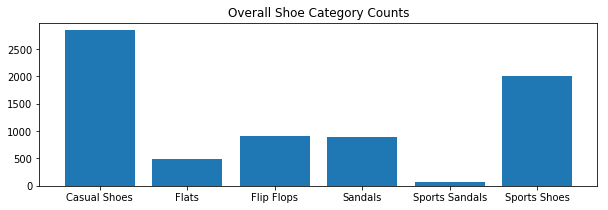

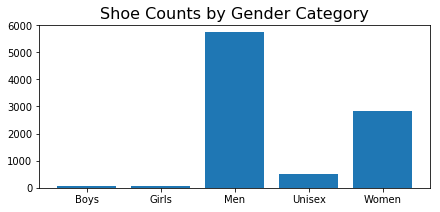

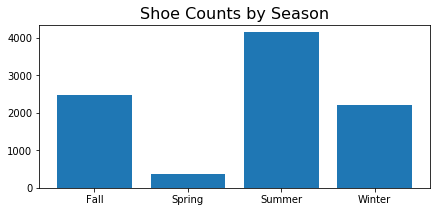

In [22]:
footwear = df.groupby(['masterCategory', 'articleType', 'season', 'gender']).count().reset_index()
footwear = footwear.loc[footwear['masterCategory'] == 'Footwear']
shoes = ['Casual Shoes', 'Flats', 'Flip Flops', 'Sandals', 'Sports Sandals', 'Sports Shoes']
shoe_count = dict()

print('These graphs show the breakdown of the dataset by shoe types, gender, and season. There are 9,184 shoes in the')
print('dataset.')

for shoe in shoes:
    shoe_count[shoe] = article_counts(df, 'articleType', shoe)
    
plt.figure(figsize=(10,3))
plt.bar(range(len(shoe_count)), list(shoe_count.values()), align='center')
plt.xticks(range(len(shoe_count)), list(shoe_count.keys()))
plt.title('Overall Shoe Category Counts')
plt.show()

shoe_gen_counts = df.groupby(['gender', 'subcat_2']).count().reset_index()
shoe_gen_counts = cat_filter(shoe_gen_counts, 'subcat_2', 'shoes')

shoe_season_counts = df.groupby(['season', 'subcat_2']).count().reset_index()
shoe_season_counts = cat_filter(shoe_season_counts, 'subcat_2', 'shoes')


bar_graph((7,3), shoe_gen_counts['gender'], shoe_gen_counts['id'], 'Shoe Counts by Gender Category')
bar_graph((7,3), shoe_season_counts['season'], shoe_season_counts['id'], 'Shoe Counts by Season')

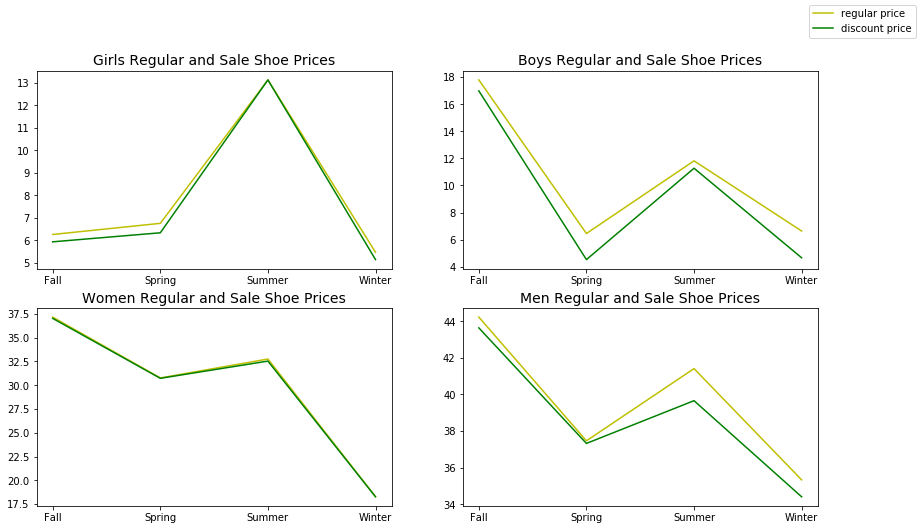

In [75]:
footwear_price = df.groupby(['masterCategory', 'articleType', 'season', 'gender']).mean().reset_index()
footwear_price = footwear.loc[footwear['masterCategory'] == 'Footwear']
foot_gen_price = df.groupby(['subcat_2', 'season', 'gender']).mean().reset_index()
foot_gen_price = cat_filter(foot_gen_price, 'subcat_2', 'shoes')

girls = foot_gen_price.loc[foot_gen_price['gender'] == 'Girls']
boys = foot_gen_price.loc[foot_gen_price['gender'] == 'Boys']
women = foot_gen_price.loc[foot_gen_price['gender'] == 'Women']
men = foot_gen_price.loc[foot_gen_price['gender'] == 'Men']

fig, axs = plt.subplots(2,2, figsize=(14,8))
x = men['season']
y = men['price_us']
g1, g2 = girls['price_us'], girls['price_disc']
l1, l2 = axs[0,0].plot(x, g1, 'y', x, g2, 'g')
axs[0,0].set_title('Girls Regular and Sale Shoe Prices', fontsize=14)
b1, b2 = boys['price_us'], boys['price_disc']
l1, l2 = axs[0,1].plot(x, b1, 'y', x, b2, 'g')
axs[0,1].set_title('Boys Regular and Sale Shoe Prices', fontsize=14)
w1, w2 = women['price_us'], women['price_disc']
l1, l2 = axs[1,0].plot(x, w1, 'y', x, w2, 'g')
axs[1,0].set_title('Women Regular and Sale Shoe Prices', fontsize=14)
m1, m2 = men['price_us'], men['price_disc']
l1, l2 = axs[1,1].plot(x, m1, 'y', x, m2, 'g')
axs[1, 1].set_title('Men Regular and Sale Shoe Prices', fontsize=14)
fig.legend((l1, l2), ('regular price', 'discount price'), 'upper right')

plt.show()

The average discount rate per gender is

gender
Boys       3.07
Girls      2.59
Men       13.72
Unisex     8.45
Women      3.31
Name: reduction, dtype: float64


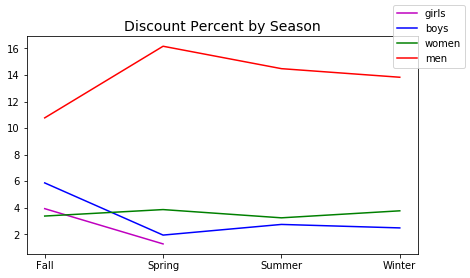

In [77]:
shoe_mean = df.groupby(['subcat_2', 'gender']).mean().round(2).reset_index()
shoe_mean = cat_filter(shoe_mean, 'subcat_2', 'shoes')
shoe_mean = shoe_mean.set_index('gender')
#shoe_mean = top_mean.set_index('gender')

shoe_std = df.groupby(['subcat_2', 'gender']).std().round(2).reset_index()
shoe_std = cat_filter(shoe_std, 'subcat_2', 'shoes')
#shoe_std = top_std.set_index('gender')

print('The average discount rate per gender is\n\n{}'.format(shoe_mean['reduction']))

fig, ax = plt.subplots(1,1, figsize=(7,4))
x = men['season']
g = (girls['reduction'])
b = (boys['reduction'])
w = (women['reduction'])
m = (men['reduction'])
l1, l2, l3, l4 = ax.plot(x, g, 'm', x, b, 'b', x, w, 'g', x, m, 'r')
ax.set_title('Discount Percent by Season', fontsize=14)
fig.legend((l1, l2, l3, l4), ('girls', 'boys', 'women', 'men'), 'upper right')

plt.show()

<h2>Question 3. How has the price of apparel items carried the company changed over time? Have particular styles changed more than others?</h2> <a name="q3"></a>

<b>Introduction</b>

Understanding customer product demand across time is important to any retailer. We do not have sales figures in the dataset, but we can look at how prices and discount rates have change through time to get a feel for the types of items that sold. There are 1,607 pairs of pants for men and women in the collection, with Womens making up 39 percent of the collection (n=624) and Mens making up the rest (61 percent, n=983). For this exploration, Boys, Girls, and Unisex styles have been omitted.

These graphs show the breakdown of the dataset by shoe types, gender, and season. There are 9,184 shoes in the
dataset.


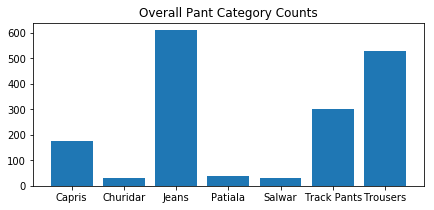

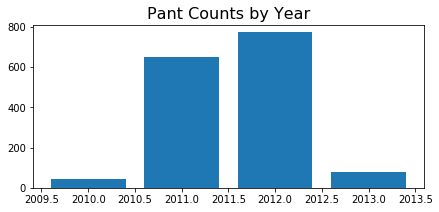

In [79]:
pants = df[df['subcat_2']=='pants']
pant_cat = ['Capris', 'Churidar', 'Jeans', 'Patiala', 'Salwar', 'Track Pants', 'Trousers']
pant_count = dict()

print('These graphs show the breakdown of the dataset by shoe types, gender, and season. There are 9,184 shoes in the')
print('dataset.')

for p in pant_cat:
    pant_count[p] = article_counts(df, 'articleType', p)
    
plt.figure(figsize=(7,3))
plt.bar(range(len(pant_count)), list(pant_count.values()), align='center')
plt.xticks(range(len(pant_count)), list(pant_count.keys()))
plt.title('Overall Pant Category Counts')
plt.show()

pant_year_counts = df.groupby(['year', 'subcat_2']).count().reset_index()
pant_year_counts = cat_filter(pant_year_counts, 'subcat_2', 'pants')

bar_graph((7,3), pant_year_counts['year'], pant_year_counts['id'], 'Pant Counts by Year')

In [94]:
trouser_std = trouser_price.std().round(2)
jeans_std = jeans_price.std().round(2)
track_std = track_price.std().round(2)
capri_std = capri_price.std().round(2)

print('The average standard price deviation for these styles over the time period is:')
print('Trousers: ${}'.format(trouser_std['price_us']))
print('Jeans: ${}'.format(jeans_std['price_us']))
print('Track Pants: ${}'.format(track_std['price_us']))
print('Capris: ${}'.format(capri_std['price_us']))

The average standard price deviation for these styles over the time period is:
Trousers: $2.03
Jeans: $2.6
Track Pants: $2.46
Capris: $2.74


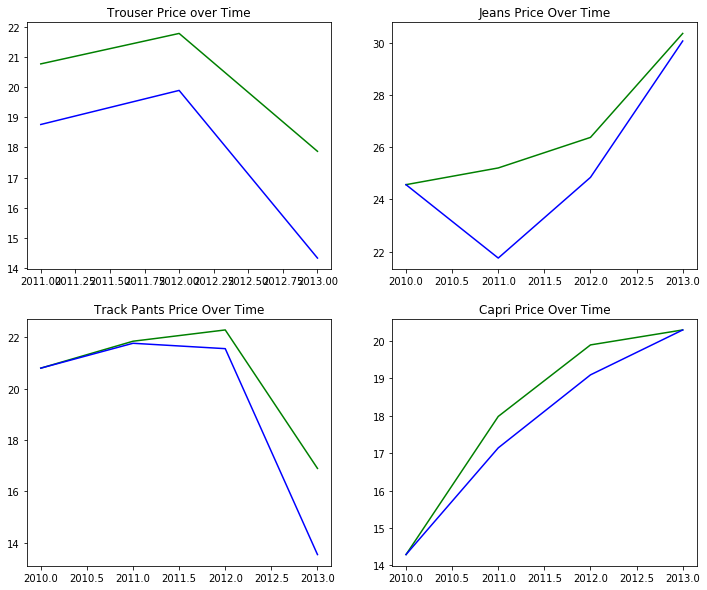

In [80]:
def line_graph (size, data1, data2, title, color):
    plt.figure(figsize=size)
    plt.plot(data1, data2, color)
    plt.title(title, fontsize=14)

pant_type = pants.groupby(['articleType', 'year']).mean().round(2).reset_index()

trouser_price = pant_type[pant_type['articleType'] == 'Trousers']
jeans_price = pant_type[pant_type['articleType'] == 'Jeans']
track_price = pant_type[pant_type['articleType'] == 'Track Pants']
capri_price = pant_type[pant_type['articleType'] == 'Capris']


fig, axs = plt.subplots(2,2, figsize=(12,10))
axs[0,0].plot(trouser_price['year'], trouser_price['price_us'], color='green')
axs[0,0].plot(trouser_price['year'], trouser_price['price_disc'], color='blue')
axs[0,0].set_title('Trouser Price over Time')
axs[0,1].plot(jeans_price['year'], jeans_price['price_us'], color='green')
axs[0,1].plot(jeans_price['year'], jeans_price['price_disc'], color='blue')
axs[0,1].set_title('Jeans Price Over Time')
axs[1,0].plot(track_price['year'], track_price['price_us'], color='green')
axs[1,0].plot(track_price['year'], track_price['price_disc'], color='blue')
axs[1,0].set_title('Track Pants Price Over Time')
axs[1,1].plot(capri_price['year'], capri_price['price_us'], color='green')
axs[1,1].plot(capri_price['year'], capri_price['price_disc'], color='blue')
axs[1,1].set_title('Capri Price Over Time')
plt.show()


<h3>Dataset Challenges and Future Work</h3> <a name='dc'></a>

This biggest advantage of this dataset is the number and variety of products available for exploration, and while pricing data is very useful, the lack of sales data would make it challenging to make predictions. 

Technical challenges to the data included the sheer number of items and figuring out how to group and sort them all to use for data explorations. After struggling with building dictionaries of filtered dataframes, I decided it was easier to add a second subcategory column that would allow me to use the broad groups of 'shirt', 'pants', and 'shoes' to help in grouping my data.

Other challenges include missing data from some years (ex. girls and boys sales were missing from several years and women's pants data was missing for 2014). It's likely that this is just a function of how the random sample was pulled, but we cannot be sure and that could bring a bias into observations. For nodes that had very few SKUs (example umbrellas (12) and perfume (1), I eliminated them from the dataset altogether. This brought down the total sample numbers but led to a more robust set of articles to work with.

Future Work

I chose this dataset because of it's classification possibilites, and I look forward to doing machine learning drills with these SKUs. Future statistical explration could involve looking for futher variations in pricing among gendered items in other categories (ex accessories) and comparing them with unisex items (ex. bags has many backpacks and duffel bags that are classified by gender and also many that are unisex, so that would be a good starting point).

Another area of exploration is the looking at rates of dicsounts in women's vs men's clothing across seasons. Does this pattern hold true across all types of articles? Is it related to the fact that women's items are priced lower to begin with in many cases, and do discounts in men's item bring men's overall prices lower than women's total sales price?

